In [89]:
#!/usr/bin/env python
# coding: utf-8
# python3

import re,numpy as np, random, operator, matplotlib.pyplot as plt

In [90]:
#Function to read the content of a .tsp file from the tsplib library
def read_tsp_data(tsp_name):
	tsp_name = tsp_name
	with open(tsp_name) as f:
		content = f.read().splitlines()
		cleaned = [x.lstrip() for x in content if x != ""]
		return cleaned

In [91]:
#Function to obtain the number of cities from the instance

def detect_dimension(in_list):
	non_numeric = re.compile(r'[^\d]+')
	for element in in_list:
		if element.startswith("DIMENSION"):
			return non_numeric.sub("",element)

In [92]:
#Function to get the list of cities
 
def get_cities(list,dimension):
	cities_set = []
	dimension = int(dimension)
	for item in list:
		for num in range(1, dimension + 1):
			if item.startswith(str(num)):
				index, space, rest = item.partition(' ')
				if rest not in cities_set:
					cities_set.append(rest)
	return cities_set

In [93]:
#Function to brake each coordinate to a tuple

def city_tup(list):
	cities_tups = []
	for item in list:
		first_coord, space, second_coord = item.partition(' ')
		cities_tups.append((float(first_coord.strip()), float(second_coord.strip())))
	return cities_tups

In [94]:
#Function to get the cities as a dictionary

def create_cities_dict(cities_tups):
	return dict(zip((range(1,len(cities_tups)+1)),cities_tups))

def read_tsp(dimension,data):
	cities_dict = create_cities_dict(city_tup(get_cities(data,dimension)))	
	return cities_dict

In [95]:
#Function to evaluate an individu

def evaluation(individu,cities):
    #print(individu)
    distance = 0.0
    for i in range(0, len(individu)):
        fromCity = individu[i]
        toCity = None
        if i+1 < len(individu):
            toCity = individu[i+1]
        else:
            toCity = individu[0]
        xDiff = cities.get(fromCity)[0]-cities.get(toCity)[0]
        yDiff = cities.get(fromCity)[1]-cities.get(toCity)[1]
        distance += round(np.sqrt((xDiff ** 2) + (yDiff ** 2)))
    return distance

In [96]:
#Function to a display a tour

def plottour(instance,individu,cities):
	plt.figure(figsize=(8, 10), dpi=100)  
	plt.title('Traveling Salesman : ' + instance)
	for point in cities.values():
		plt.plot(point[0],point[1],'ro')
	x=[]
	y=[]
	for i in range(0, len(individu)):
		x.append(cities.get(individu[i])[0])
		y.append(cities.get(individu[i])[1])

	#retour ville de départ
	x.append(cities.get(individu[0])[0])
	y.append(cities.get(individu[0])[1])

	plt.plot(x,y,color='black', lw=1)
	
	#plt.ion()
	plt.show()
	#plt.pause(5) 

{1: (1380.0, 939.0), 2: (2848.0, 96.0), 3: (3510.0, 1671.0), 4: (457.0, 334.0), 5: (3888.0, 666.0), 6: (984.0, 965.0), 7: (2721.0, 1482.0), 8: (1286.0, 525.0), 9: (2716.0, 1432.0), 10: (738.0, 1325.0), 11: (1251.0, 1832.0), 12: (2728.0, 1698.0), 13: (3815.0, 169.0), 14: (3683.0, 1533.0), 15: (1247.0, 1945.0), 16: (123.0, 862.0), 17: (1234.0, 1946.0), 18: (252.0, 1240.0), 19: (611.0, 673.0), 20: (2576.0, 1676.0), 21: (928.0, 1700.0), 22: (53.0, 857.0), 23: (1807.0, 1711.0), 24: (274.0, 1420.0), 25: (2574.0, 946.0), 26: (178.0, 24.0), 27: (2678.0, 1825.0), 28: (1795.0, 962.0), 29: (3384.0, 1498.0), 30: (3520.0, 1079.0), 31: (1256.0, 61.0), 32: (1424.0, 1728.0), 33: (3913.0, 192.0), 34: (3085.0, 1528.0), 35: (2573.0, 1969.0), 36: (463.0, 1670.0), 37: (3875.0, 598.0), 38: (298.0, 1513.0), 39: (3479.0, 821.0), 40: (2542.0, 236.0), 41: (3955.0, 1743.0), 42: (1323.0, 280.0), 43: (3447.0, 1830.0), 44: (2936.0, 337.0), 45: (1621.0, 1830.0), 46: (3373.0, 1646.0), 47: (1393.0, 1368.0), 48: (3874.

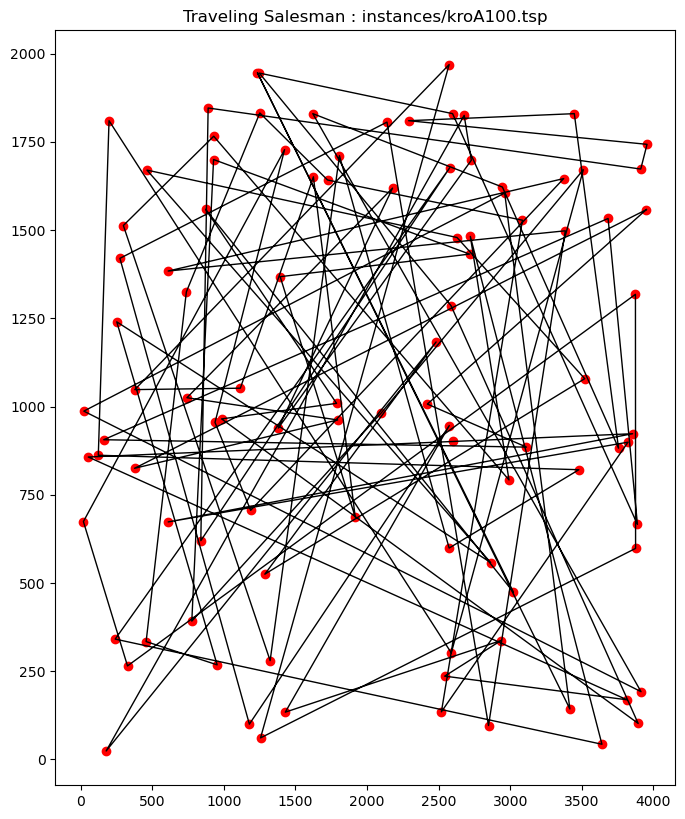

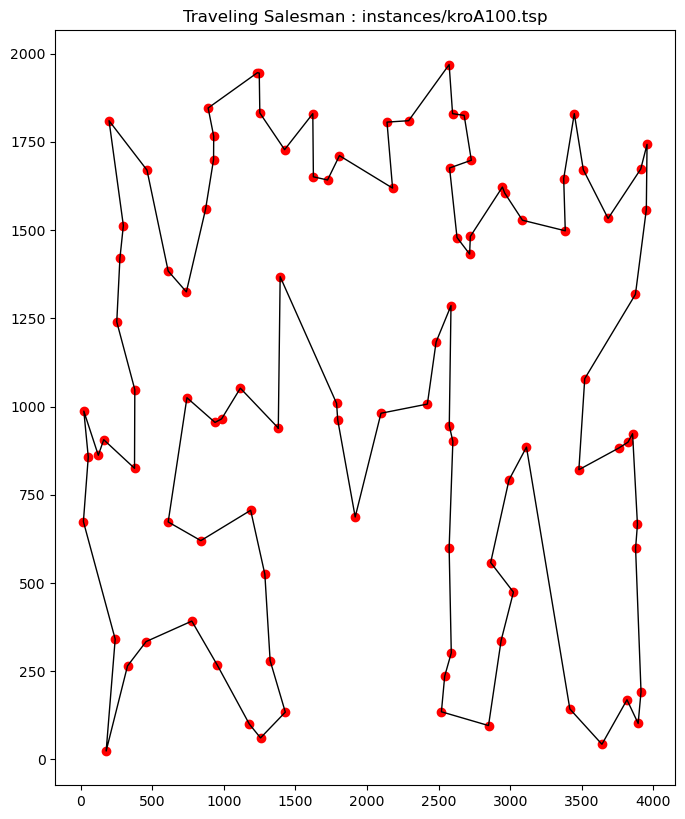

In [72]:
def main():
    instance = "instances/kroA100.tsp"
    data = read_tsp_data(instance)
    nbCities = int(detect_dimension(data))
    cities = read_tsp(nbCities,data)
    print(cities)
    print('Number of cities = ', nbCities)
    #Random solution
    individu = random.sample(range(1,nbCities+1), nbCities)	
    print(individu)
    print('EvaluationRd = ',evaluation(individu,cities))
    print('FitnessRd = ',1/evaluation(individu,cities))
    #Optimal solution for KroA100.tsp
    individuOptimal=[1,47,93,28,67,58,61,51,87,25,81,69,64,40,54,2,44,50,73,68,85,82,95,13,76,33,
    37,5,52,78,96,39,30,48,100,41,71,14,3,43,46,29,34,83,55,7,9,57,20,12,27,86,35,62,60,77,23,98,91,
    45,32,11,15,17,59,74,21,72,10,84,36,99,38,24,18,79,53,88,16,94,22,70,66,26,65,4,97,56,80,31,89,42,
    8,92,75,19,90,49,6,63]
    print('EvaluationOptimal = ',evaluation(individuOptimal,cities))
    print('FitnessOptimal = ',1/evaluation(individuOptimal,cities))	

    plottour(instance,individu,cities)
    plottour(instance,individuOptimal,cities)

main()

In [109]:
def selection(p, f, n):
    distribution = 1/f
    distribution = distribution/distribution.sum()
    p1, p2 = np.random.choice(range(n), 2, p = distribution)
    while(p1 == p2):
        p1, p2 = np.random.choice(range(n), 2, p = distribution)
        
    return p[p1], p[p2]

def croisement_Operator(p1: list,p2: list):
    z_gauche = set(p1[:len(p1)//2])
    z = z_gauche | (set(p2) - z_gauche)
    z = list(z)
    #print(len(z))
    return z

def mutation_Operator(z, pm):
    #for i in range(len(z)):
    t = np.random.choice(range(2), p = [1-pm, pm])
    if(t):
        t2 = int(random.random()*len(z))
        z[t], z[t2] = z[t2], z[t]
    return z

In [110]:
def gen_Algorithm(n, nbg, pm, cities):
    #Générer une population initiale P de N individus
    nbCities = len(cities)
    f_list = []
    p = [random.sample(range(1,nbCities+1), nbCities) for i in range(n) ]
    #print(len(p[0]))
    f = np.zeros(n)
    for k in range(nbg):
        #print(k)
        for i in range(n):
            #print(i)
            f[i] = evaluation(p[i], cities)
        p_prime = []
        
        f_list.append(f.min())
        #print(f_list)
        #indices_f = np.argsort(f)
        for i in range(n//2):
            #Selection : Choisir deux parents dans P en utilisant les évaluations fi
            p1, p2 = selection(p, f, n)
            #Croisement :Croiser les deux parents pour obtenir deux nouveaux individus
            z1 = croisement_Operator(p1, p2)
            z2 = croisement_Operator(p2, p1)
            #print(z)
            #Mutation : Avec une probabilité pm, modifier les nouveaux individus
            z1 = mutation_Operator(z1, pm)
            z2 = mutation_Operator(z2, pm)
            #print(z)
            #Insertion : Insérer les nouveaux individus dans P′
            p_prime.append(z1)
            p_prime.append(z2)
        
        p = np.array(p_prime)
        #print(p)
        
    for i in range(n):
        f[i] = evaluation(p[i], cities)
    
    
    f_max_index = np.argmin(f)
    
    
    plt.figure()
    plt.plot(f_list)
    plt.show()
    
    
    return p[f_max_index]

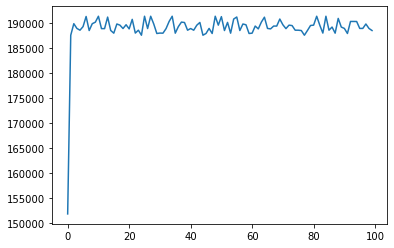

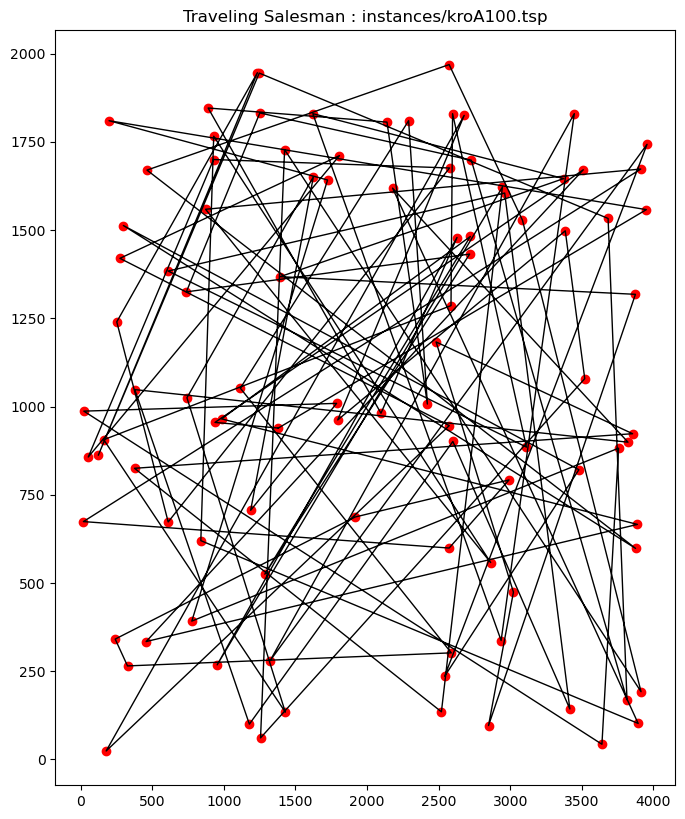

In [111]:
instance = "instances/kroA100.tsp"
data = read_tsp_data(instance)
nbCities = int(detect_dimension(data))
#print(nbCities)

cities = read_tsp(nbCities,data)
#print(len(cities))
p = gen_Algorithm(20, 100, 0.2, cities)

plottour(instance, p, cities)